In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import os
import seaborn

### 1. Data preparation

In [2]:
BTCUSDT = pd.read_csv('./data/0_klines_BTCUSDT_15m.csv')
BTCUSDT['open_time'] = pd.to_datetime(BTCUSDT['open_time'])
BTCUSDT.set_index(BTCUSDT['open_time'], inplace=True)
BTCUSDT.drop(columns=['open_time'], inplace=True)
pd.concat([BTCUSDT.head(2), BTCUSDT.tail(2)])

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,pair_id
open_time,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4280.56,4261.48,4261.48,2.189061,2017-08-17 04:14:59.999,9.333621e+03,9,0.489061,2.089105e+03,0
2017-08-17 04:15:00+00:00,4261.48,4270.41,4261.32,4261.45,9.119865,2017-08-17 04:29:59.999,3.889113e+04,40,3.447113,1.470393e+04,0
2021-08-03 23:30:00+00:00,38330.72,38483.63,38275.36,38357.01,241.850511,2021-08-03 23:44:59.999,9.275988e+06,6356,121.162953,4.646674e+06,0
2021-08-03 23:45:00+00:00,38359.70,38366.96,38068.31,38207.05,436.283529,2021-08-03 23:59:59.999,1.667138e+07,10326,180.002878,6.878062e+06,0


In [3]:
ETHUSDT = pd.read_csv('./data/0_klines_ETHUSDT_15m.csv')
ETHUSDT['open_time'] = pd.to_datetime(ETHUSDT['open_time'])
ETHUSDT.set_index(ETHUSDT['open_time'], inplace=True)
ETHUSDT.drop(columns=['open_time'], inplace=True)
pd.concat([ETHUSDT.head(2), ETHUSDT.tail(2)])

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,pair_id
open_time,,,,,,,,,,,
2017-08-17 04:00:00+00:00,301.13,301.13,298.00,298.00,5.80167,2017-08-17 04:14:59.999,1.744766e+03,22,5.48392,1.649449e+03,0
2017-08-17 04:15:00+00:00,298.00,300.80,298.00,299.39,31.44065,2017-08-17 04:29:59.999,9.396918e+03,26,12.11712,3.625167e+03,0
2021-08-03 23:30:00+00:00,2509.47,2520.60,2507.31,2517.45,3495.52586,2021-08-03 23:44:59.999,8.786277e+06,6648,1764.73154,4.435969e+06,0
2021-08-03 23:45:00+00:00,2517.45,2521.72,2493.81,2509.04,7354.60357,2021-08-03 23:59:59.999,1.843360e+07,12322,3179.19710,7.972134e+06,0


In [4]:
ADAUSDT = pd.read_csv('./data/0_klines_ADAUSDT_15m.csv')
ADAUSDT['open_time'] = pd.to_datetime(ADAUSDT['open_time'])
ADAUSDT.set_index(ADAUSDT['open_time'], inplace=True)
ADAUSDT.drop(columns=['open_time'], inplace=True)
pd.concat([ADAUSDT.head(2), ADAUSDT.tail(2)])

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,pair_id
open_time,,,,,,,,,,,
2018-04-17 04:00:00+00:00,0.25551,0.28800,0.25551,0.26709,2920063.72,2018-04-17 04:14:59.999,7.805330e+05,1377,1005341.03,2.685841e+05,0
2018-04-17 04:15:00+00:00,0.26708,0.26869,0.26008,0.26301,2558095.43,2018-04-17 04:29:59.999,6.749617e+05,1350,967622.47,2.545293e+05,0
2021-08-03 23:30:00+00:00,1.36820,1.37230,1.36550,1.36790,1215045.93,2021-08-03 23:44:59.999,1.662862e+06,4876,640011.21,8.759757e+05,0
2021-08-03 23:45:00+00:00,1.36780,1.37000,1.36210,1.36960,1500597.94,2021-08-03 23:59:59.999,2.051786e+06,4765,770160.78,1.053619e+06,0


In [5]:
XRPUSDT = pd.read_csv('./data/0_klines_XRPUSDT_15m.csv')
XRPUSDT['open_time'] = pd.to_datetime(XRPUSDT['open_time'])
XRPUSDT.set_index(XRPUSDT['open_time'], inplace=True)
XRPUSDT.drop(columns=['open_time'], inplace=True)
pd.concat([XRPUSDT.head(2), XRPUSDT.tail(2)])

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,pair_id
open_time,,,,,,,,,,,
2018-05-04 08:00:00+00:00,0.50000,1.50000,0.5000,0.92999,454626.05,2018-05-04 08:14:59.999,4.163640e+05,510,297386.29,273598.359492,0
2018-05-04 08:15:00+00:00,0.92999,0.95001,0.9080,0.91809,1840797.36,2018-05-04 08:29:59.999,1.698667e+06,3665,525214.18,483921.912907,0
2021-08-03 23:30:00+00:00,0.71560,0.71800,0.7153,0.71650,1366086.27,2021-08-03 23:44:59.999,9.788036e+05,1227,776042.88,556135.429411,0
2021-08-03 23:45:00+00:00,0.71650,0.71670,0.7114,0.71360,2075764.15,2021-08-03 23:59:59.999,1.481859e+06,2073,838558.74,598692.677330,0


In [6]:
DOGEUSDT = pd.read_csv('./data/0_klines_DOGEUSDT_15m.csv')
DOGEUSDT['open_time'] = pd.to_datetime(DOGEUSDT['open_time'])
DOGEUSDT.set_index(DOGEUSDT['open_time'], inplace=True)
DOGEUSDT.drop(columns=['open_time'], inplace=True)
pd.concat([DOGEUSDT.head(2), DOGEUSDT.tail(2)])

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,pair_id
open_time,,,,,,,,,,,
2019-07-05 12:00:00+00:00,0.004490,0.004600,0.003760,0.00387,615633795.0,2019-07-05 12:14:59.999,2.552778e+06,4089,232551781.0,975265.392673,0
2019-07-05 12:15:00+00:00,0.003861,0.003964,0.003763,0.00381,195552992.0,2019-07-05 12:29:59.999,7.599869e+05,1302,90157312.0,351233.850182,0
2021-08-05 23:30:00+00:00,0.201880,0.201880,0.201330,0.20153,5773895.7,2021-08-05 23:44:59.999,1.163642e+06,1976,2361525.1,475872.182229,0
2021-08-05 23:45:00+00:00,0.201540,0.201540,0.200540,0.20095,7873689.2,2021-08-05 23:59:59.999,1.582324e+06,2407,3975469.9,799060.255980,0


In [7]:
BNBUSDT = pd.read_csv('./data/0_klines_BNBUSDT_15m.csv')
BNBUSDT['open_time'] = pd.to_datetime(BNBUSDT['open_time'])
BNBUSDT.set_index(BNBUSDT['open_time'], inplace=True)
BNBUSDT.drop(columns=['open_time'], inplace=True)
pd.concat([BNBUSDT.head(2), BNBUSDT.tail(2)])

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,pair_id
open_time,,,,,,,,,,,
2017-11-06 03:45:00+00:00,1.50,1.799,0.50,1.70,649.1200,2017-11-06 03:59:59.999,7.251214e+02,33,207.4500,3.514144e+02,0
2017-11-06 04:00:00+00:00,1.30,1.650,1.30,1.54,2414.1000,2017-11-06 04:14:59.999,3.759038e+03,42,865.7300,1.428244e+03,0
2021-08-05 23:30:00+00:00,338.69,339.660,338.15,339.06,8389.4332,2021-08-05 23:44:59.999,2.843599e+06,4200,4022.8149,1.363776e+06,0
2021-08-05 23:45:00+00:00,339.06,339.090,337.71,337.91,12298.2910,2021-08-05 23:59:59.999,4.161239e+06,5275,5317.9061,1.798570e+06,0


In [8]:
common_index = XRPUSDT.index
ETHUSDT = ETHUSDT.reindex(common_index).ffill()
BTCUSDT = BTCUSDT.reindex(common_index).ffill()
ADAUSDT = ADAUSDT.reindex(common_index).ffill()
BNBUSDT = BNBUSDT.reindex(common_index).ffill()
DOGEUSDT = DOGEUSDT.reindex(common_index).ffill()

In [10]:
BTCUSDT['rebased_close'] = BTCUSDT['close'] / BTCUSDT['close'].iloc[0] 
ETHUSDT['rebased_close'] = ETHUSDT['close'] / ETHUSDT['close'].iloc[0] 
ADAUSDT['rebased_close'] = ADAUSDT['close'] / ADAUSDT['close'].iloc[0]
XRPUSDT['rebased_close'] = XRPUSDT['close'] / XRPUSDT['close'].iloc[0]
DOGEUSDT['rebased_close'] = DOGEUSDT['close'] / DOGEUSDT['close'].iloc[0]
BNBUSDT['rebased_close'] = BNBUSDT['close'] / BNBUSDT['close'].iloc[0]

### 2. Data visualization

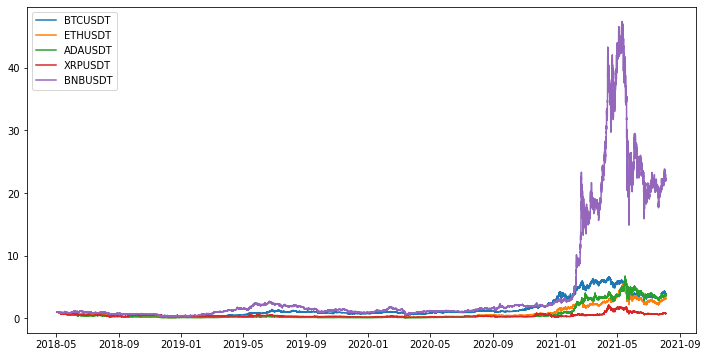

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(BTCUSDT.index, BTCUSDT['rebased_close'], label='BTCUSDT')
plt.plot(ETHUSDT.index, ETHUSDT['rebased_close'], label='ETHUSDT')
plt.plot(ADAUSDT.index, ADAUSDT['rebased_close'], label='ADAUSDT')
plt.plot(XRPUSDT.index, XRPUSDT['rebased_close'], label='XRPUSDT')
# plt.plot(DOGEUSDT.index, DOGEUSDT['rebased_close'], label='DOGEUSDT')
plt.plot(BNBUSDT.index, BNBUSDT['rebased_close'], label='BNBUSDT')
plt.legend();

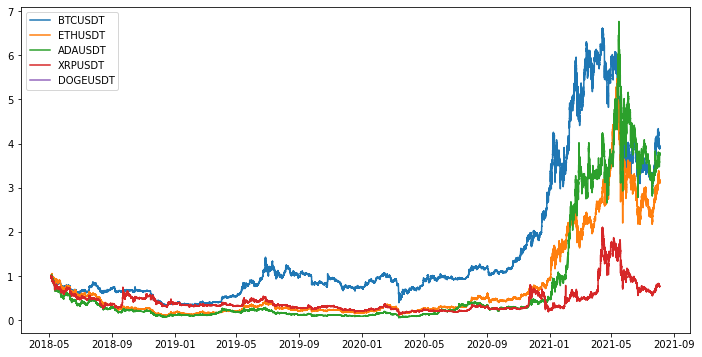

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(BTCUSDT.index, BTCUSDT['rebased_close'], label='BTCUSDT')
plt.plot(ETHUSDT.index, ETHUSDT['rebased_close'], label='ETHUSDT')
plt.plot(ADAUSDT.index, ADAUSDT['rebased_close'], label='ADAUSDT')
plt.plot(XRPUSDT.index, XRPUSDT['rebased_close'], label='XRPUSDT')
plt.plot(DOGEUSDT.index, DOGEUSDT['rebased_close'], label='DOGEUSDT')
plt.legend();

In [16]:
prices = pd.DataFrame(data={'BTCUSDT':BTCUSDT['close'], 'ETHUSDT':ETHUSDT['close'], 
                           'ADAUSDT':ADAUSDT['close'], 'XRPUSDT':XRPUSDT['close'],
                           'BNBUSDT':BNBUSDT['close']}, index=common_index)
print(len(prices))
prices.head(5)

113659


,BTCUSDT,ETHUSDT,ADAUSDT,XRPUSDT,BNBUSDT
open_time,,,,,
2018-05-04 08:00:00+00:00,9780.00,794.05,0.36386,0.92999,14.5350
2018-05-04 08:15:00+00:00,9763.65,792.39,0.36453,0.91809,14.4400
2018-05-04 08:30:00+00:00,9795.73,799.39,0.36560,0.93500,14.4775
2018-05-04 08:45:00+00:00,9798.50,805.74,0.36444,0.92300,14.6398
2018-05-04 09:00:00+00:00,9755.99,804.60,0.36306,0.92300,14.7120


### 3. Testing for Cointegration (select right coins for pair trading strategy)

In [14]:
def find_cointegrated_pairs(data): # takes a few mins to run
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
# Heatmap shows the p-values of the cointegration test between each pair of coins
CoinsIds = ['BTCUSDT', 'ETHUSDT', 'ADAUSDT', 'XRPUSDT', 'BNBUSDT']

scores, pvalues, pairs = find_cointegrated_pairs(prices)

# m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=CoinsIds, 
                yticklabels=CoinsIds, cmap='RdYlGn_r', 
                mask = (pvalues >= 0.98))
plt.show()
print(pairs) # to be automated using below strategy #

##### Looks like 3 pairs of coins are cointegrated : ETHUSDT, ADAUSDT and ADAUSDT, BNBUSDT and XRPUSDT, BNBUSDT

In [17]:
def plot_ratio_zscore(coin1, coin2):
    ratios = ratio(coin1, coin2)
    zscore(ratios).plot(label='Ratio z-score', figsize=(12, 6))
    plt.axhline(zscore(ratios).mean(), color='black', label='mean')
    plt.axhline(1.0, linestyle='--', color='red', label='+1')
    plt.axhline(-1.0, linestyle='--', color='green', label='-1')
    plt.legend(); 

In [18]:
def ratio(coin1, coin2):
    # ex: prices['ETHUSDT']/prices['ADAUSDT']
    return prices[coin1]/prices[coin2]

def zscore(series):
    return (series - series.mean()) / np.std(series)

In [19]:
def plot_series(coin1, coin2, scaling=10):
    
    fig = plt.figure(figsize=(15, 22))
    ax1 = fig.add_subplot(611)
    color = 'blue'
    # ax1.set_xlabel('time (s)')
    ax1.set_title(f"{coin1} and {coin2} Price Time Series")
    ax1.set_ylabel(f'{coin1}', color=color)
    ax1.plot(prices[coin1], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  

    color = 'red'
    ax2.set_ylabel(f'{coin2}', color=color) 
    ax2.plot(prices[coin2], '--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax3 = fig.add_subplot(612)
    ratio = prices[coin1]/prices[coin2]
    ax3.set_title(f"{coin1} to {coin2} Price Ratio")
    ax3.plot(ratio)
    ax3.axhline(ratio.mean(), color='red', linestyle='--')
    ax3.legend(['Mean'])
    ax3.grid(True)

    ax4 = fig.add_subplot(613)
    ax4.set_title(f"{coin1} to {coin2} Price Ratio z-score")
    ax4.plot(zscore(ratio), label='Ratio z-score')
    ax4.axhline(zscore(ratio).mean(), color='black', label='mean')
    ax4.axhline(1.0, linestyle='--', color='red', label='+1')
    ax4.axhline(-1.0, linestyle='--', color='green', label='-1')
    plt.legend()
    
    ax5 = fig.add_subplot(614)
    ax5.set_title(f"{coin1} to {coin2} Price Ratio and Moving Averages")
    train = ratio[:int(np.round(len(ratio) * 0.8))]
    test = ratio[int(np.round(len(ratio) * 0.8)):]
    
    short, long = 5, 25

    ratios_mavg_short = train.rolling(window=short, center=False).mean()
    ratios_mavg_long = train.rolling(window=long, center=False).mean()
    std_long = train.rolling(window=long, center=False).std()

    zscore_short_long = (ratios_mavg_short - ratios_mavg_long)/std_long

    ax5.plot(train.index[:1000], train.values[:1000], linewidth=1)
    ax5.plot(ratios_mavg_short.index[:1000], ratios_mavg_short.values[:1000], linewidth=1.2)
    ax5.plot(ratios_mavg_long.index[:1000], ratios_mavg_long.values[:1000], linewidth=1.2)
    plt.legend(['Ratio',f'{short} periods Ratio MA', f'{long} periods Ratio MA'])
    plt.ylabel('Ratio')
    
    
    # zoom in
    start = 100
    length = 1000

    ax6 = fig.add_subplot(615)
    ax6.set_title(f"'Rolling Ratio z-Score")
    ax6.plot(zscore_short_long[start:start+length])
    ax6.axhline(0, color='black')
    ax6.axhline(1.0, color='red', linestyle='--')
    ax6.axhline(-1.0, color='green', linestyle='--')
    plt.legend(['Mean', '+1', '-1'], loc='upper right')
    
    ax7 = fig.add_subplot(616)
    ax7.plot(train[start:start+length])
    buy = train.copy()
    sell = train.copy()
    buy[zscore_short_long > -1] = 0
    sell[zscore_short_long < 1] = 0
    buy[start:start+length].plot(color='g', linestyle='None', marker='^')
    sell[start:start+length].plot(color='r', linestyle='None', marker='^')
    x1,x2,y1,y2 = plt.axis()
    ax7.axis((x1,x2,train[start:start+length].min()-scaling,train[start:start+length].max()+scaling))
    ax7.set_title('buy-sell signal')
    ax7.tick_params(axis='x', labelrotation=0)
    ax7.set_xlabel('')
    plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
    
    plt.subplots_adjust(
#                     left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
                    hspace=0.4)
    plt.show()

In [20]:
def plot_signal(coin1, coin2, buffer=10):
    ratio = prices[coin1]/prices[coin2]
    train = ratio[:int(np.round(len(ratio) * 0.8))]

    plt.figure(figsize=(15,6))

    start = 100
    length = 500
    short, long = 5, 25

    ratios_mavg_short = train.rolling(window=short, center=False).mean()
    ratios_mavg_long = train.rolling(window=long, center=False).mean()
    std_long = train.rolling(window=long, center=False).std()

    zscore_short_long = (ratios_mavg_short - ratios_mavg_long)/std_long

    train[start:start+length].plot()
    buy = train.copy()
    sell = train.copy()
    buy[zscore_short_long > -1] = 0
    sell[zscore_short_long < 1] = 0
    buy[start:start+length].plot(color='g', linestyle='None', marker='^')
    sell[start:start+length].plot(color='r', linestyle='None', marker='^')
    
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,train[start:start+length].min()-buffer,train[start:start+length].max()+buffer))
    plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
    plt.title('buy-sell signal')
    plt.show()

In [21]:
def calc_spread(coin1, coin2, t=0, window=-1, plot_spread=False, ADF_test=False):
    
    ts, te = t-window, t
    print(f"ts:{ts}, te:{te}")
    
    S1 = prices[coin1].iloc[t:] if windows==-1 else prices[coin1].iloc[ts:te]
    S2 = prices[coin2].iloc[t:] if windows==-1 else prices[coin2].iloc[ts:te]
    
    S1 = sm.add_constant(S1)
    results = sm.OLS(S2, S1).fit()
    S1 = S1[coin1]
    b = results.params[coin1]

    spread = S2 - b * S1
    print(f"beta:{b}")
    
    if plot_spread:
        spread.plot()
        plt.axhline(spread.mean(), color='black')
        plt.legend(['Spread']);
        
    if ADF_test:
        print(f"p-value for {coin2}-{coin1} spread stationarity: {adfuller(spread)[1]}")
        # Our p-value is greater than 0.05 so we conclude that this calculation of
        # the spread is non-stationary out of sample
    
    return S1, S2, spread, b

### 4. Pair trading strategy and backtest

In [32]:
class PairTradingBacktester:
    """
    symbol1, synbol2: str
       coin tickers e.g. 'ETHUSDT', 'ADAUSDT',...
    start: int
        start index for data selection
    end: int
        end index for data selection
    amount: int, float
        amount to be invested at the beginning e.g. 10000 (for 10000 USD)
    tc: float
        proportional transaction costs (e.g., 0.5% = 0.005) per trade
    """
        
    def __init__(self, symbol1, symbol2, start, end, amount, tc):
        self.symbol1 = symbol1
        self.symbol2 = symbol2
        self.start = start
        self.end = end
        self.amount = amount
        self.tc = tc
        self.results = None
        self.get_data()
    
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        S1 = prices[self.symbol1].iloc[self.start:self.end]
        S2 = prices[self.symbol2].iloc[self.start:self.end]
        self.data = S1.to_frame()
        self.data = self.data.join(S2)
    
    def run_strategy(self, window1, window2, n_stddev_entry=1, n_stddev_exit=0.5, log=False):
        ''' Backtests the trading strategy.
        '''
        rolling_beta = RollingOLS(self.data[coin2], self.data[coin1], window=window2).fit()
        beta = rolling_beta.params[coin1] # hedge ratio
        
        # 1. construct the portfolio (which consists of the spread):
        self.data['spread'] = self.data[coin2] - beta * self.data[coin1]
    
        ma1 = self.data['spread'].rolling(window=window1).mean()
        ma2 = self.data['spread'].rolling(window=window2).mean()
        std2 = self.data['spread'].rolling(window=window2).std()
        
        if std2.all() > 0:
            self.data['zscore'] = (ma1 - ma2)/std2 
            
        # save benchmark returns
        self.data[f'{coin1}_ret'] = self.data[coin1].pct_change()
        self.data[f'{coin2}_ret'] = self.data[coin2].pct_change()

        # 2. Get the portfolio’s daily revenue (price difference, "daily" P&L for one unit):
        self.data['pnl'] = self.data['spread'].diff()
        
        self.data.dropna(inplace=True)
        
        # 3. calculate the positions based on our strategy:
        # Sell short if the z-score is > n_stddev_entry
        self.data['position'] = np.where(self.data['zscore'] > n_stddev_entry, -1, np.nan)
        
        # Buy long if the z-score is < -n_stddev_entry
        self.data['position'] = np.where(self.data['zscore'] < -n_stddev_entry, 1, self.data['position'])
        
        # If there is a change in the sign of the spread, go market neutral (set 0),
        # otherwise keep the column position unchanged.
        self.data['position'] = np.where(self.data['zscore'] * self.data['zscore'].shift(1) < 0, 0, self.data['position'])
#         self.data['position'] = np.where(np.abs(self.data['zscore']) < n_stddev_exit, 0, self.data['position'])
        
        # Forward fill all NaN positions with the previous values; replace all remaining NaN values by 0
        self.data['position'] = self.data['position'].ffill().fillna(0)
        
        # 4. "daily" P&L from our strategy
        self.data['strategy'] = self.data['position'].shift(1) * self.data['pnl']
        
        # determine when a trade takes place
        trades = self.data['position'].diff().fillna(0) != 0
        
        # FOR TEST
        self.data['trade'] = trades
        # FOR TEST />
        
        # subtract transaction costs from return when trade takes place
        self.data['strategy'][trades] -= self.tc
        
        # 5. Equity Curve
        self.data['equity_curve'] = self.data['strategy'].cumsum()

        if log:
            fig = plt.figure(figsize=(12, 26))
            
            ax01 = fig.add_subplot(711)

            ax01.plot(self.data[coin1].index, self.data[coin1].values, color='blue')
            ax01.set_ylabel(coin1, color='blue')
            ax02 = ax01.twinx()
            
            ax02.plot(self.data[coin2].index, self.data[coin2].values, color='orange')
            ax02.set_ylabel(coin2, color='orange')
            
            ax1 = fig.add_subplot(712)
            ax1.plot(ma1.index, ma1.values)
            ax1.plot(ma2.index, ma2.values)
            ax1.plot(self.data['spread'].index, self.data['spread'].values)
            ax1.legend(['spread MA1', 'spread MA2', 'spread'])

            ax2 = fig.add_subplot(713)
            ax2.set_title('rolling beta')
            ax2.plot(beta.index, beta.values)
            
            ax3 = fig.add_subplot(714)
            ax3.set_title('zscore')
            ax3.plot(self.data['zscore'].index, self.data['zscore'].values)
            
            ax4 = fig.add_subplot(715)
            ax4.set_title('position')
            ax4.plot(self.data['position'].index, self.data['position'].values)
            
            ax5 = fig.add_subplot(716)
            ax5.set_title('pnl from strat')
            ax5.plot(self.data['strategy'].index, self.data['strategy'].values)
            ax5.legend(['strategy'])
            
#             ax6 = fig.add_subplot(817)
#             ax6.set_title('Equity Curve')
#             ax6.plot(self.data['equity_curve'].index, self.data['equity_curve'].values)
#             ax6.legend(['strategy'])

            ax7 = fig.add_subplot(717)
            ax7.plot(self.data['equity_curve'].index, self.data['equity_curve'].values)
            ax7.plot(self.data[f'{coin1}_ret'].index, ((self.data[f'{coin1}_ret']+1).cumprod()-1).values)
            ax7.plot(self.data[f'{coin2}_ret'].index, ((self.data[f'{coin2}_ret']+1).cumprod()-1).values)
            ax7.legend(['Strategy Equity Curve', f'{coin1} buyhold return', f'{coin2} buyhold return'])

            plt.show()
        
        return self.data

#### ETHUSDT & ADAUSDT

In [33]:
coin1, coin2 = 'ETHUSDT', 'ADAUSDT'

In [34]:
# plot_series(coin1, coin2)

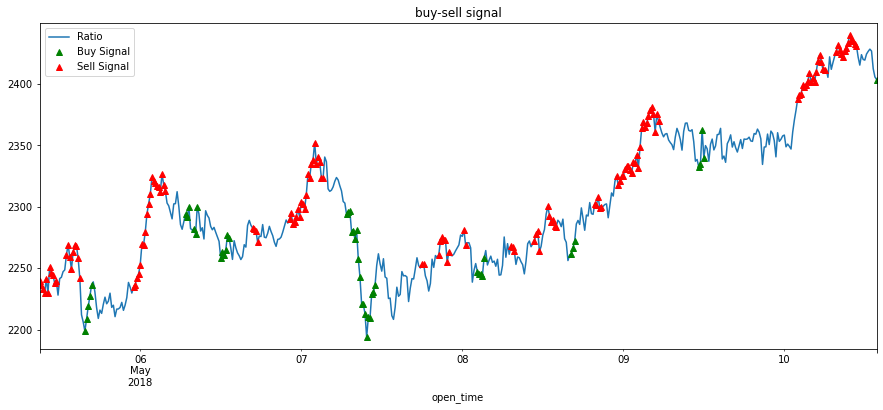

In [35]:
plot_signal(coin1, coin2)

<ipython-input-32-f3cc790067c3>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['strategy'][trades] -= self.tc


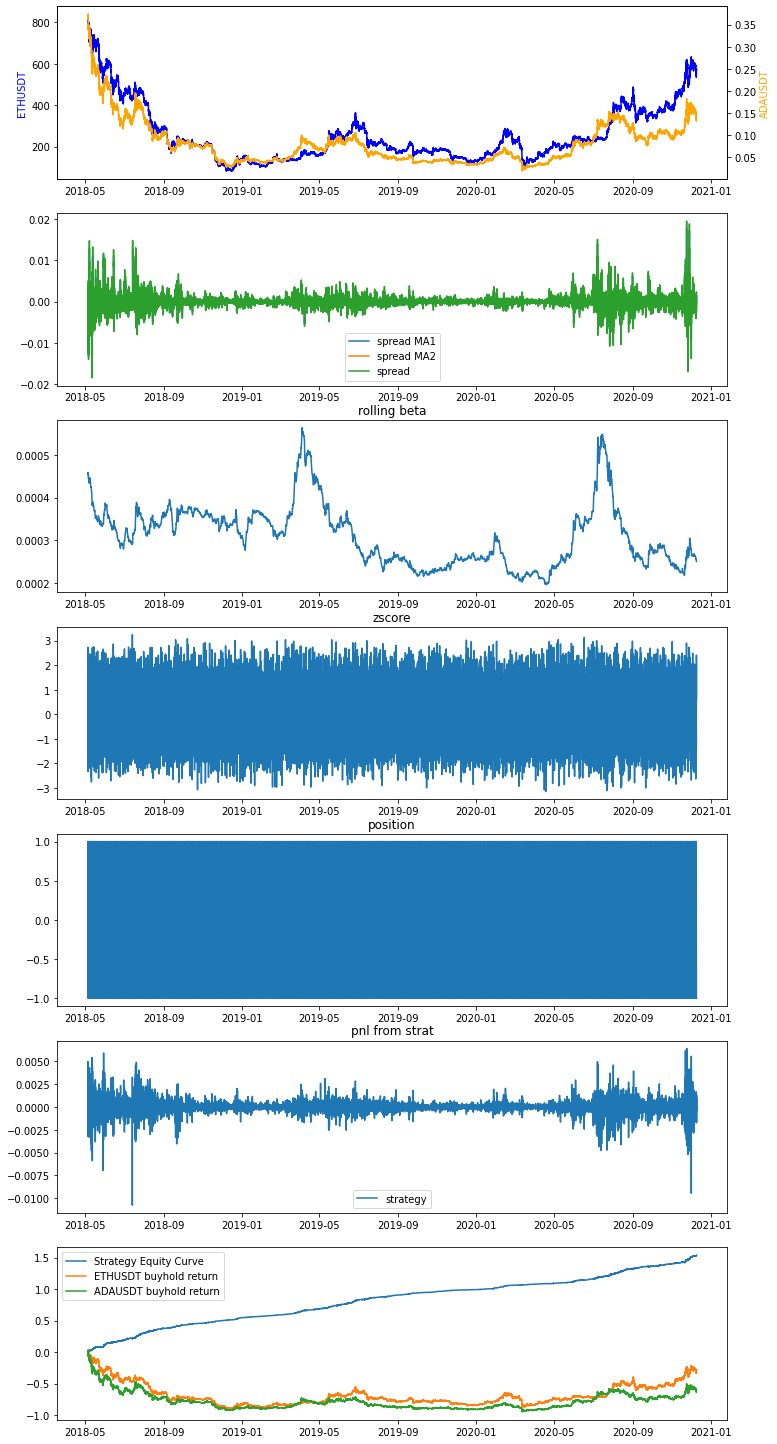

In [36]:
# ma1 = 5
# ma2 = 25
size = 90928
n_std_entry = 1
n_std_exit = 0.5
ma1 = 4
ma2 = 48
amount = 10000 # to work on "portfolio value"
tc = 0 # trading cost

# symbol1, symbol2, start, end, amount, tc
bt = PairTradingBacktester(coin1, coin2, 0, size, amount, tc)

# window1, window2, n_stddev_entry=1, n_stddev_exit=0.5, log=False
res = bt.run_strategy(ma1, ma2, n_std_entry, n_std_exit, True)
# res

In [29]:
res.tail(50)

,ETHUSDT,ADAUSDT,spread,zscore,ETHUSDT_ret,ADAUSDT_ret,pnl,position,strategy,trade,equity_curve
open_time,,,,,,,,,,,
2020-12-09 02:15:00+00:00,549.22,0.13918,-0.000929,-0.699782,0.002629,0.005999,0.000487,1.0,0.000487,False,1.535082
2020-12-09 02:30:00+00:00,550.29,0.13867,-0.001668,-0.877265,0.001948,-0.003664,-0.000739,1.0,-0.000739,False,1.534343
2020-12-09 02:45:00+00:00,549.87,0.13862,-0.001573,-0.870220,-0.000763,-0.000361,0.000095,1.0,0.000095,False,1.534438
2020-12-09 03:00:00+00:00,550.94,0.13890,-0.001518,-0.870031,0.001946,0.002020,0.000054,1.0,0.000054,False,1.534493
2020-12-09 03:15:00+00:00,549.58,0.13790,-0.002112,-1.121729,-0.002469,-0.007199,-0.000594,1.0,-0.000594,False,1.533899
2020-12-09 03:30:00+00:00,550.47,0.13864,-0.001546,-1.057019,0.001619,0.005366,0.000566,1.0,0.000566,False,1.534465
2020-12-09 03:45:00+00:00,552.12,0.13914,-0.001419,-0.993094,0.002997,0.003606,0.000128,1.0,0.000128,False,1.534592
2020-12-09 04:00:00+00:00,550.51,0.13858,-0.001534,-0.986982,-0.002916,-0.004025,-0.000116,1.0,-0.000116,False,1.534477
2020-12-09 04:15:00+00:00,550.04,0.13871,-0.001220,-0.734232,-0.000854,0.000938,0.000314,1.0,0.000314,False,1.534791


In [30]:
# trades = res['position'].diff().fillna(0) != 0
# trades

In [31]:
# m1 = prices[coin1].iloc[:size].mean()
# m2 = prices[coin2].iloc[:size].mean()
# print(f'{coin1}~:{m1:.4f}, {coin2}~:{m2:.4f}, r={coin1}/{coin2}~{m1/m2:.4f}, 1/r~{m2/m1:.4f}')

#### ADAUSDT & BNBUSDT

In [ ]:
# coin1, coin2 = 'ADAUSDT', 'BNBUSDT'

In [ ]:
# plot_series(coin1, coin2, 0.0005)

In [ ]:
# m1 = prices[coin1].iloc[:90928].mean()
# m2 = prices[coin2].iloc[:90928].mean()
# print(f'{coin1}~:{m1:.4f}, {coin2}~:{m2:.4f}, r={coin1}/{coin2}~{m1/m2:.4f}, 1/r~{m2/m1:.4f}')

#### XRPUSDT & BNBUSDT

In [ ]:
# coin1, coin2 = 'XRPUSDT', 'BNBUSDT'

In [ ]:
# plot_series(coin1, coin2, 0.001)

In [ ]:
# m1 = prices[coin1].iloc[:90928].mean()
# m2 = prices[coin2].iloc[:90928].mean()
# print(f'{coin1}~:{m1:.4f}, {coin2}~:{m2:.4f}, r={coin1}/{coin2}~{m1/m2:.4f}, 1/r~{m2/m1:.4f}')